# Introdução à Redes Neurais

Implementaremos, a seguir, a abstração em código de um Perceptron, ou seja, de um neurônio artificial que é a base de qualquer RNA. O perceptron foi **inventado em 1943** por Warren McCulloch e Walter Pitts. A primeira **implementação de hardware** foi a máquina Mark I Perceptron construída em **1957 por Frank Rosenblatt** no Cornell Aeronautical Laboratory. Ele pode ser visto como o tipo mais simples de rede neural feedforward: um classificador linear.

## Leituras recomendadas:

*  [DeepLearning Book - Capítulo 6 O Perceptron](https://https://www.deeplearningbook.com.br/o-perceptron-parte-1/#:~:text=Perceptron%20%C3%A9%20uma%20rede%20neural,os%20dados%20de%20entrada%20fornecidos.)
*  [Artigo original de uso do Perceptron em um computador](https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf)



In [10]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate = 0.1):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, X, y, epochs = 1):
        for epoch in range(epochs):
          for x, label, in zip(X, y):
            prediction = self.predict(x)
            error = label - prediction

            self.weights += self.learning_rate * error * x
            self.bias += self.learning_rate * error

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(num_inputs=2)
perceptron.train(X, y, epochs=100)

print ("0 AND 0 =", perceptron.predict([0, 0]))
print ("0 AND 1 =", perceptron.predict([0, 1]))
print ("1 AND 0 =", perceptron.predict([1, 0]))
print ("1 AND 1 =", perceptron.predict([1, 1]))

0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


**Exercício 1:** Mude a quantidade de épocas para 1 e execute a célula várias vezes. O que acontece com o resultado? Por quê?

Em seguida, aumente o número de épocas para 10, o que acontece mesmo executando a célula várias vezes?


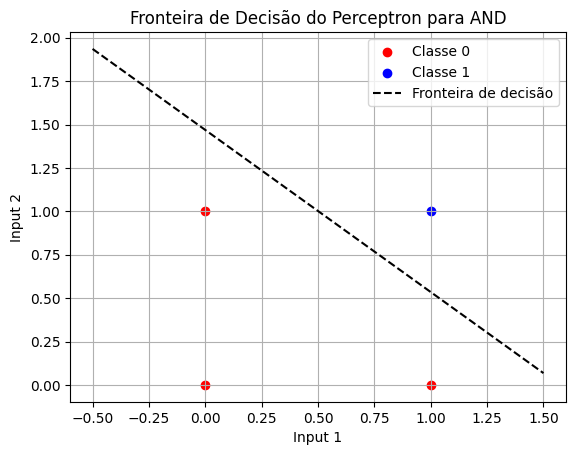

In [12]:
import matplotlib.pyplot as plt


plt.scatter([0, 0, 1], [0, 1, 0], color='red', label='Classe 0')
plt.scatter([1], [1], color='blue', label='Classe 1')

x = np.linspace(-0.5, 1.5, 100)
y = (-perceptron.weights[0] * x - perceptron.bias) / perceptron.weights[1]
plt.plot(x, y, 'k--', label='Fronteira de decisão')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.title('Fronteira de Decisão do Perceptron para AND')
plt.grid(True)
plt.show()

In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

perceptron = Perceptron(num_inputs=2)
perceptron.train(X, y, epochs=1000)

print ("0 XOR 0 =", perceptron.predict([0, 0]))
print ("0 XOR 1 =", perceptron.predict([0, 1]))
print ("1 XOR 0 =", perceptron.predict([1, 0]))
print ("1 XOR 1 =", perceptron.predict([1, 1]))


0 XOR 0 = 1
0 XOR 1 = 1
1 XOR 0 = 0
1 XOR 1 = 0


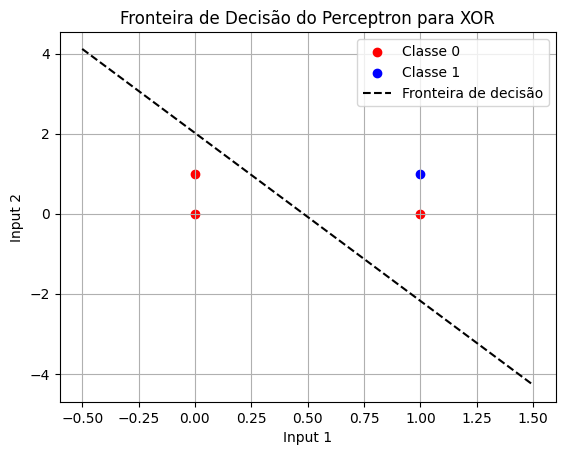

In [14]:
import matplotlib.pyplot as plt

plt.scatter([0, 0, 1], [0, 1, 0], color='red', label='Classe 0')
plt.scatter([1], [1], color='blue', label='Classe 1')

x = np.linspace(-0.5, 1.5, 100)
y = (-perceptron.weights[0] * x - perceptron.bias) / perceptron.weights[1]
plt.plot(x, y, 'k--', label='Fronteira de decisão')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.title('Fronteira de Decisão do Perceptron para XOR')
plt.grid(True)
plt.show()

**Exercício 2:** Aumente a quantidade de épocas para tentar que a rede aprenda e gere a saída correta da porta XOR. O que acontece e porquê?

R: O perceptron só pode aprender fronteiras de decisão lineares e o XOR requer uma fronteira não-linear

In [17]:
class NeurealNetwork:
    def __init__(self, input_size, hidden_size, ouput_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((hidden_size))
        self.W2 = np.random.randn(hidden_size, ouput_size)
        self.b2 = np.zeros((ouput_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, X, y, epochs = 100, learning_rate = 0.1):
        for epoch in range(epochs):
            # Forward pass
            h = self.sigmoid(np.dot(X, self.W1) + self.b1)
            output = self.sigmoid(np.dot(h, self.W2) + self.b2)

            # Backpropagation
            error = y - output
            d_output = error * self.sigmoid_derivative(output)
            error_hidden = np.dot(d_output, self.W2.T)
            d_hidden = error_hidden * self.sigmoid_derivative(h)

            # Update weights and biases
            self.W2 += learning_rate * np.dot(h.T, d_output)
            self.b2 += learning_rate * np.sum(d_output, axis=0)
            self.W1 += learning_rate * np.dot(X.T, d_hidden)
            self.b1 += learning_rate * np.sum(d_hidden, axis=0)

    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.W1) + self.b1)
        output = self.sigmoid(np.dot(h, self.W2) + self.b2)
        return output

In [20]:
nn = NeurealNetwork(input_size=2, hidden_size=2, ouput_size=1)

nn.train(X, y, epochs=1000)

# Testa a rede neural treinada
for xi, yi in zip(X, y):
	pred = nn.predict(xi.reshape(1, -1))
	print(f"Entrada: {xi}, Esperado: {yi[0]}, Predito: {pred[0][0]:.3f}")

Entrada: [0 0], Esperado: 0, Predito: 0.495
Entrada: [0 1], Esperado: 1, Predito: 0.414
Entrada: [1 0], Esperado: 1, Predito: 0.615
Entrada: [1 1], Esperado: 0, Predito: 0.454


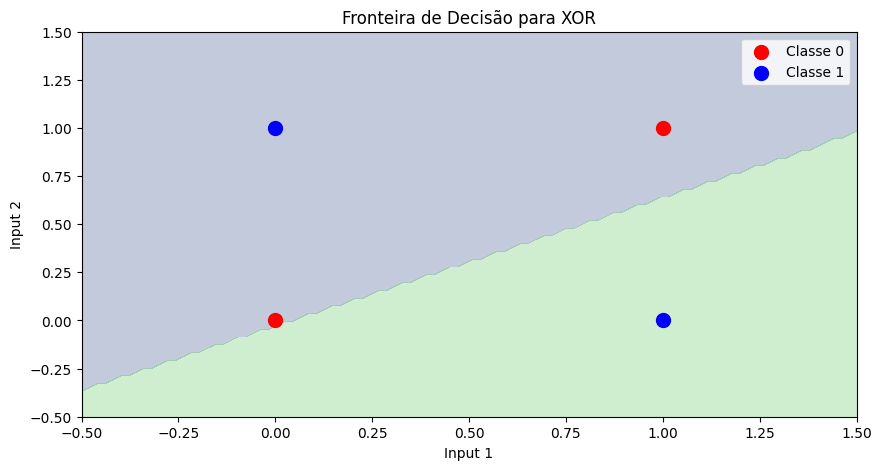

In [21]:
import matplotlib.pyplot as plt

# Cria grid para visualização
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,100), np.linspace(-0.5,1.5,100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Calcula previsões
Z = np.array([nn.predict(p)[0] for p in grid]).reshape(xx.shape)

# Plota
plt.figure(figsize=(10,5))
plt.contourf(xx, yy, Z > 0.5, alpha=0.3)
plt.scatter([0,1], [0,1], color='red', s=100, label='Classe 0')
plt.scatter([0,1], [1,0], color='blue', s=100, label='Classe 1')
plt.title("Fronteira de Decisão para XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.show()